<a href="https://colab.research.google.com/github/Nkashyap-anand/human-posture-estimation/blob/main/TF_CNN_human_posture_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
from time import sleep as s
import cv2
import os
import pandas as pd
import random as rm

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/training",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
validation_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/validation",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
test_dataset = train.flow_from_directory("/content/drive/MyDrive/posture/testing",
                                    target_size= (512,512),
                                    batch_size= 4,
                                    class_mode="categorical")

Found 2880 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16,(3,3),activation ="relu", input_shape =(512,512,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(256,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation = "relu"),
tf.keras.layers.Dense(4,activation ="softmax")])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)      

In [10]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" ,metrics =["accuracy"])

In [12]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch= 32,
                     epochs= 50,
                     validation_data= validation_dataset)

Epoch 1/50
32/32 [==============================] - 126s 4s/step - loss: 0.9155 - accuracy: 0.6719 - val_loss: 0.9958 - val_accuracy: 0.6250
Epoch 2/50
32/32 [==============================] - 73s 2s/step - loss: 0.8370 - accuracy: 0.6641 - val_loss: 0.7861 - val_accuracy: 0.7146
Epoch 3/50
32/32 [==============================] - 93s 3s/step - loss: 0.6296 - accuracy: 0.7344 - val_loss: 0.7053 - val_accuracy: 0.7646
Epoch 4/50
32/32 [==============================] - 73s 2s/step - loss: 0.5527 - accuracy: 0.8203 - val_loss: 0.6939 - val_accuracy: 0.7594
Epoch 5/50
32/32 [==============================] - 82s 3s/step - loss: 0.5571 - accuracy: 0.7891 - val_loss: 0.6465 - val_accuracy: 0.7667
Epoch 6/50
32/32 [==============================] - 69s 2s/step - loss: 0.5996 - accuracy: 0.8203 - val_loss: 0.6477 - val_accuracy: 0.7583
Epoch 7/50
32/32 [==============================] - 63s 2s/step - loss: 0.4920 - accuracy: 0.8438 - val_loss: 0.6415 - val_accuracy: 0.7594
Epoch 8/50
32/32 [=

In [13]:
test_predictions = model.predict(test_dataset)
test_predictions

array([[5.5827990e-02, 8.6333640e-03, 1.5560582e-02, 9.1997802e-01],
       [9.6022449e-02, 1.2734737e-02, 6.6002405e-01, 2.3121874e-01],
       [9.5337446e-06, 9.9568617e-01, 4.3042153e-03, 1.2698095e-07],
       ...,
       [1.6459699e-05, 9.9935967e-01, 5.3806574e-04, 8.5811691e-05],
       [1.2115076e-04, 6.7729761e-06, 8.8742323e-04, 9.9898463e-01],
       [2.2597557e-04, 7.0906740e-01, 2.9032350e-01, 3.8313033e-04]],
      dtype=float32)

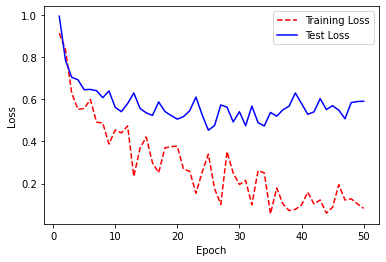

In [17]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model_fit.history['loss']
test_loss = model_fit.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

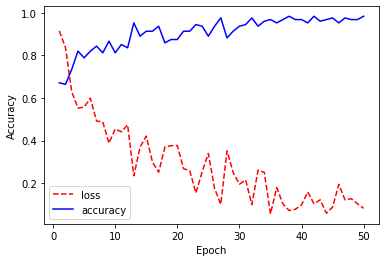

In [16]:
loss = model_fit.history['loss']
accuracy = model_fit.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['loss', 'accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();